In [15]:
import random

def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean

flipSim(1000, 10)

0.4989

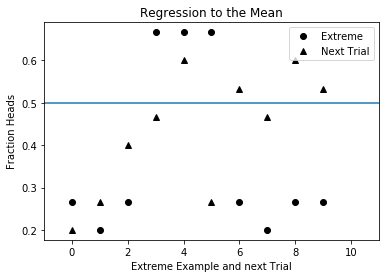

In [30]:
import pylab
# 平均への回帰の検証
def regressToMean(numFlips, numTrials):
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips))
    extremes, nextTrials = [], []
    for i in range(len(fracHeads) -1):
        if fracHeads[i] < 0.33 or fracHeads[i] > 0.66:
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])
    pylab.clf()
    pylab.plot(range(len(extremes)), extremes, 'ko', label = 'Extreme')
    pylab.plot(range(len(nextTrials)), nextTrials, 'k^', label = 'Next Trial')
    pylab.axhline(0.5)
    pylab.xlim(-1, len(extremes) + 1) # 最初と最後の結果が枠と重ならないよう-1〜len + 1の範囲としている
    pylab.xlabel('Extreme Example and next Trial')
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc = 'best')
    pylab.show()
    
regressToMean(15, 40)

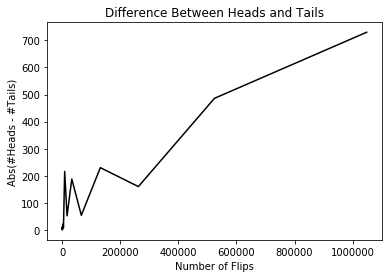

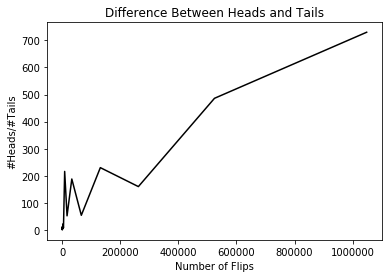

In [57]:
def flipPlot(minExp, maxExp):
    ratios, diffs, xAxis = [], [], []
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    # diff
    pylab.clf()
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'k')
    pylab.show()
    
    # ratio
    pylab.clf()
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, diffs, 'k')
    pylab.show()

random.seed(0)
flipPlot(4, 20)

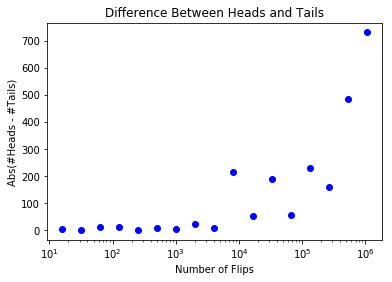

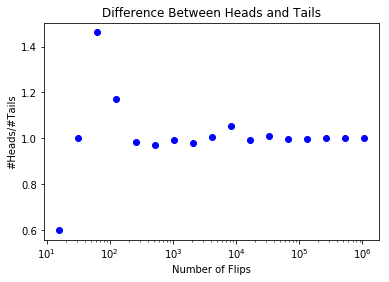

In [55]:
# グラフを対数表示にする
def flipPlot(minExp, maxExp):
    ratios, diffs, xAxis = [], [], []
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    # diff
    pylab.clf()
    pylab.xscale('log')
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'bo')
    pylab.show()
    
    # ratio
    pylab.clf()
    pylab.xscale('log')
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'bo')
    pylab.show()

random.seed(0)
flipPlot(4, 20)

In [63]:
def variance(X):
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return tot/len(X)

def stdDev(X):
    return variance(X)**0.5

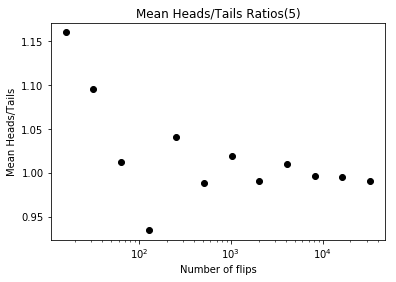

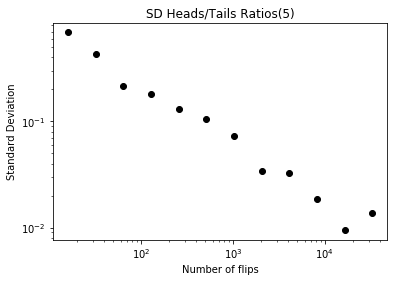

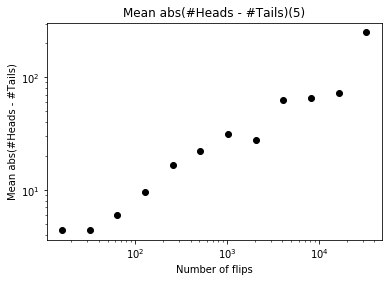

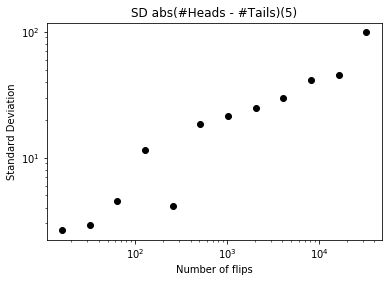

In [91]:
def makePlot(xVals, yVals, title, xLabel, yLabel, style, \
            logX = False, logY = False):
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()
    pylab.show()
    
def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads, numTails)

def flipPlot1(minExp, maxExp, numTrials):
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString = '(' + str(numTrials) + ')'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips',\
            'Mean Heads/Tails', 'ko', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of flips',\
            'Standard Deviation', 'ko', logX = True, logY = True)
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title, 'Number of flips',\
            'Mean abs(#Heads - #Tails)', 'ko', logX = True, logY = True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title, 'Number of flips',\
            'Standard Deviation', 'ko', logX = True, logY = True)

flipPlot1(4, 15, 5)

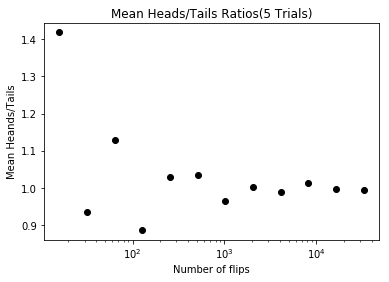

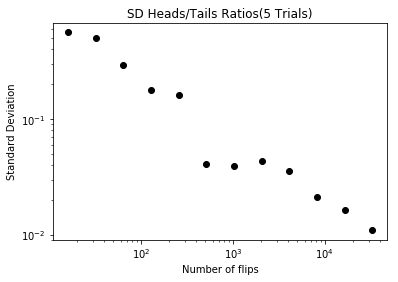

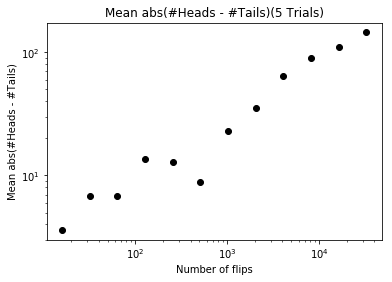

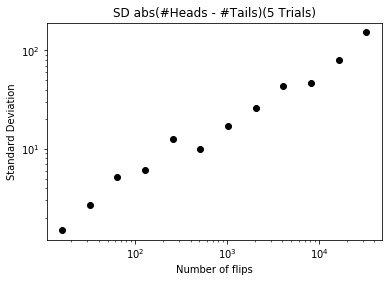

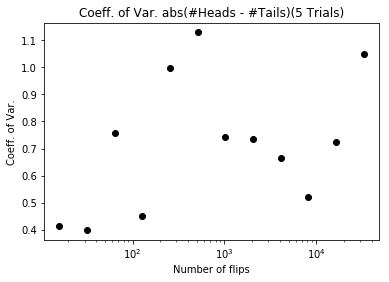

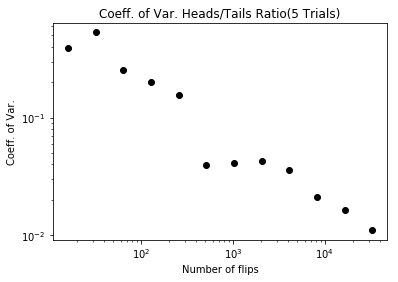

In [92]:
# 変動係数
def CV(X):
    mean = sum(X)/len(X)
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')

def flipPlot2(minExp, maxExp, numTrials):
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    ratiosCVs, diffsCVs, xAxis = [], [], []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialsString = '(' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips',\
            'Mean Heands/Tails', 'ko', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of flips',\
            'Standard Deviation', 'ko', logX = True, logY = True)
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title, 'Number of flips',\
            'Mean abs(#Heads - #Tails)', 'ko', logX = True, logY = True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title, 'Number of flips',\
            'Standard Deviation', 'ko', logX = True, logY = True)
    title = 'Coeff. of Var. abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsCVs, title, 'Number of flips',\
            'Coeff. of Var.', 'ko', logX = True)
    title = 'Coeff. of Var. Heads/Tails Ratio' + numTrialsString
    makePlot(xAxis, ratiosCVs, title, 'Number of flips',\
            'Coeff. of Var.', 'ko', logX = True, logY = True)

flipPlot2(4,15,5)    

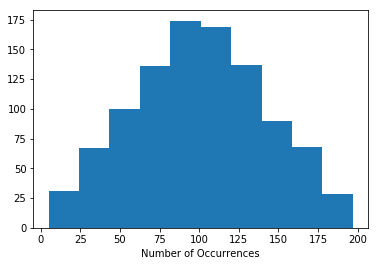

In [99]:
vals = []
for i in range(1000):
    num1 = random.choice(range(0, 101))
    num2 = random.choice(range(0, 101))
    vals.append(num1 + num2)
pylab.clf()
pylab.hist(vals, bins = 10)
pylab.xlabel('Number of Occurrences')
pylab.show()

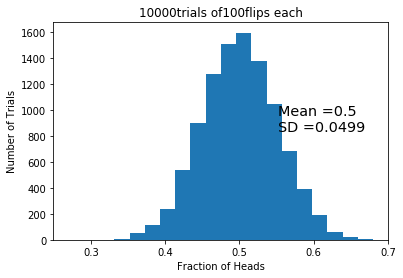

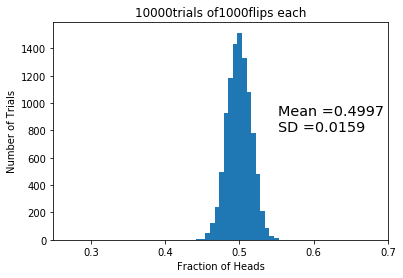

In [108]:
import random

def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/float(numFlips)

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + 'trials of' \
                + str(numFlips) + 'flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    pylab.annotate('Mean =' + str(round(mean, 4))\
                  + '\nSD =' + str(round(sd, 4)), size='x-large',\
                  xycoords = 'axes fraction', xy = (0.67, 0.5))

def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.clf()
    pylab.hist(val1, bins = 20)
    xmin, xmax = pylab.xlim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)
    pylab.show()
    
makePlots(100, 1000, 10000)

In [113]:
# 積分により面積を得る
# 下記は底辺と高さが5の三角形の面積に等しい
import scipy.integrate
def stub(x):
    print(x)
    return abs(x)
scipy.integrate.quad(stub, 0, 5)

2.5
0.06523367870707064
4.93476632129293
0.3373415832775386
4.662658416722461
0.8014760792524389
4.1985239207475615
1.4165115146768819
3.583488485323118
2.127814152545922
2.872185847454078
0.010857092435479831
4.989142907564521
0.17460627161072928
4.825393728389271
0.5479556835339578
4.452044316466042
1.0931071633284883
3.9068928366715117
1.7640178432463496
3.2359821567536504


(12.5, 1.3877787807814457e-13)

In [118]:
# 正規分布の経験則を確認(±1~3αの割合に含まれる面積を積分で計算する)
import scipy.integrate

def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print('For mu =', mu, 'and sigma =', sigma)
        for numStd in (1, 2, 3):
            area = scipy.integrate.quad(gaussian, mu-numStd*sigma, \
                                       mu+numStd*sigma,\
                                       (mu, sigma))[0]
            print('   Franction within', numStd, 'std =', round(area, 4))
            
checkEmpirical(3)

For mu = 4 and sigma = 3
   Franction within 1 std = 0.6827
   Franction within 2 std = 0.9545
   Franction within 3 std = 0.9973
For mu = 2 and sigma = 8
   Franction within 1 std = 0.6827
   Franction within 2 std = 0.9545
   Franction within 3 std = 0.9973
For mu = -10 and sigma = 5
   Franction within 1 std = 0.6827
   Franction within 2 std = 0.9545
   Franction within 3 std = 0.9973


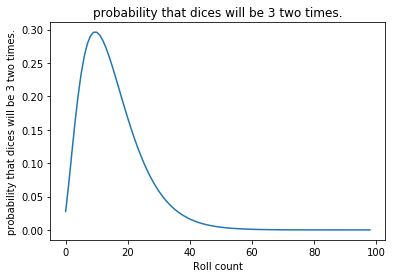

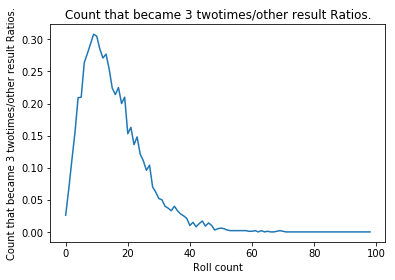

In [159]:
# サイコロを３回振り、３が２回出る確率と、シミュレーション結果
import math
def calcRollProb(rollCount, val, valCount):
    return math.factorial(rollCount)/(math.factorial(rollCount-valCount) \
                    * math.factorial(valCount)) \
                    * ((1/6)**valCount*(5/6)**(rollCount-valCount))

def plotRollProb(maxRollCount):
    probs = []
    for i in range(2, maxRollCount+1):
        probs.append(calcRollProb(i, 3, 2))
    pylab.clf()
    pylab.title('probability that dices will be 3 two times.')
    pylab.xlabel('Roll count')
    pylab.ylabel('probability that dices will be 3 two times.')
    pylab.plot(probs)
    pylab.show()

def simRollProb(maxRollCount, tryCount):
    ratios = []
    for i in range(2, maxRollCount+1):
        cnt = 0
        for j in range(tryCount):
            tmp = 0
            for k in range(i):
                if random.choice([1,2,3,4,5,6]) == 3:
                    tmp += 1
                if tmp>=3 or (i-k<=1 and tmp<=0):
                    break
            if tmp == 2:
                cnt += 1
        ratios.append(cnt/float(tryCount))
    pylab.clf()
    pylab.title('Count that became 3 twotimes/other result Ratios.')
    pylab.xlabel('Roll count')
    pylab.ylabel('Count that became 3 twotimes/other result Ratios.')
    pylab.plot(ratios)
    pylab.show()
    
plotRollProb(100)
simRollProb(100, 1000)

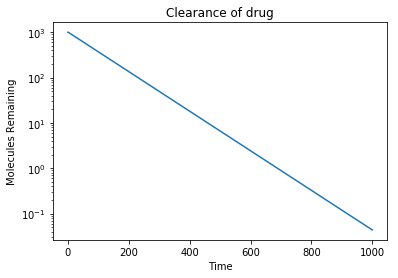

In [168]:
# 指数分布
# 分子が指数関数的減少するシミュレーション
def clear(n, p, steps):
    """nとstepsは正の整数, pは浮動小数点数
        n: 分子の初期個数
        p: 分子が消失する確率
        steps: シミュレーションの長さ"""
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-p)**t)) # 指数関数的な速さで変化する
    pylab.clf()
    pylab.plot(numRemaining)
    pylab.xlabel('Time')
    pylab.ylabel('Molecules Remaining')
    pylab.title('Clearance of drug')
    pylab.semilogy()
    pylab.show()
    
clear(1000, 0.01, 1000)

In [184]:
# ハッシュが衝突する確率
def collisionProb(n, k):
    prob = 1.0
    for i in range(1, k):
        prob = prob * ((n-i)/n)
    return 1-prob

collisionProb(1000, 50)

0.7122686568799875

In [190]:
def simInsertions(numIndices, numInsertions):
    choices = range(numIndices)
    used = []
    for i in range(numInsertions):
        hashVal = random.choice(choices)
        if hashVal in used:
            return 1
        else:
            used.append(hashVal)
    return 0

def findProb(numIndices, numInsertions, numTrials):
    collisions = 0
    for t in range(numTrials):
        collisions += simInsertions(numIndices, numInsertions)
    return collisions/numTrials

print('Actual probability of a collision =', collisionProb(1000, 50))
print('Est. probability of a collition =', findProb(1000, 50, 10000))
print('Actual probability of a collision =', collisionProb(1000, 200))
print('Est. probability of a collition =', findProb(1000, 200, 10000))

Actual probability of a collision = 0.7122686568799875
Est. probability of a collition = 0.714
Actual probability of a collision = 0.9999999994781328
Est. probability of a collition = 1.0


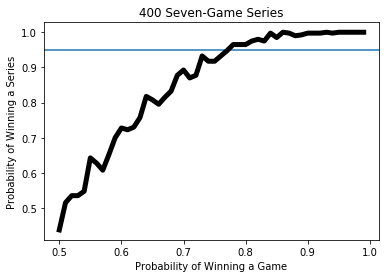

In [197]:
def playSeries(numGames, teamProb):
    numWon = 0
    for game in range(numGames):
        if random.random() <= teamProb:
            numWon += 1
    return (numWon > numGames//2)

def fractionWon(teamProb, numSeries, seriesLen):
    won = 0
    for series in range(numSeries):
        if playSeries(seriesLen, teamProb):
            won += 1
    return won/float(numSeries)

def simSeries(numSeries):
    prob = 0.5
    fracsWon, probs = [], []
    while prob <= 1.0:
        fracsWon.append(fractionWon(prob, numSeries, 7))
        probs.append(prob)
        prob += 0.01
    pylab.clf()
    pylab.axhline(0.95)
    pylab.plot(probs, fracsWon, 'k', linewidth=5)
    pylab.xlabel('Probability of Winning a Game')
    pylab.ylabel('Probability of Winning a Series')
    pylab.title(str(numSeries) + ' Seven-Game Series')
    pylab.show()

simSeries(400)    